In [1]:
print('Kazuma Shachou')

Kazuma Shachou


In [2]:
nome_do_filme = "Bakamon"

In [3]:
print(nome_do_filme)

Bakamon


In [4]:
nome_do_filme

'Bakamon'

In [5]:
import pandas as pd

In [6]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
filmes.columns = ["filmeid", "titulo",  "generos"]
filmes.head()

,filmeid,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
# Lendo a documwentação de um método atributo

?filmes.head

In [8]:
#Lendo a documentação do tipo(docstring)

?filmes
avaliacoes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv")
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [9]:
avaliacoes.shape

(100836, 4)

In [10]:
len(avaliacoes)

100836

In [11]:
avaliacoes.columns = ["usuárioid", "filmeid", "nota", "momento"]
avaliacoes.head()

,usuárioid,filmeid,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [12]:
avaliacoes.query("filmeid==1")

,usuárioid,filmeid,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [13]:
avaliacoes.describe()

,usuárioid,filmeid,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [14]:
avaliacoes["nota"]

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [15]:
avaliacoes.query("filmeid == 1").describe()

,usuárioid,filmeid,nota,momento
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


In [16]:
avaliacoes.query("filmeid == 1").mean()

usuárioid    3.065302e+02
filmeid      1.000000e+00
nota         3.920930e+00
momento      1.129835e+09
dtype: float64

In [17]:
avaliacoes.query("filmeid == 1")["nota"].mean()

3.9209302325581397

In [18]:
notas_media_por_filme =  avaliacoes.groupby("filmeid")["nota"].mean()
notas_media_por_filme.head()

filmeid
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [19]:
 #risco de filmes nao estarem em quantidade exata
 #filme["nota media"] = notas_media_por_filme
 #filmes.head()

##desafio 1: 
Encontre os 18 filmes que não tiveram avaliação


In [20]:
filmes_com_media =  filmes.join(notas_media_por_filme, on = "filmeid")
filmes_com_media.head()

,filmeid,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


##desafio 2
mudar o nome da coluna nota para media apos o join


In [21]:
filmes_com_media.sort_values("nota", ascending=False).head(15)

,filmeid,titulo,generos,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


##desafio 3
coloque o numero de avaliações por filme

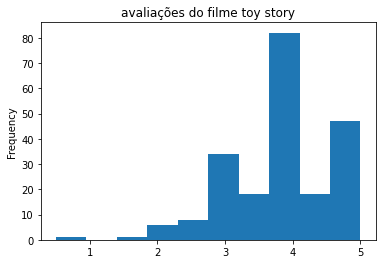

In [22]:
import matplotlib.pyplot as plt

avaliacoes.query("filmeid == 1")["nota"].plot(kind = 'hist',
                                       title= "avaliações do filme toy story")
#plt.title("Avaliações do filme toy story")
plt.show()

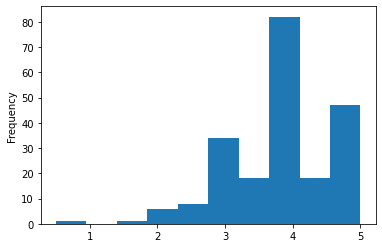

In [23]:
avaliacoes.query("filmeid == 1")["nota"].plot(kind = 'hist') 

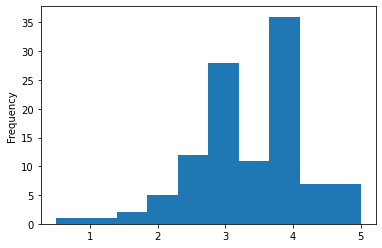

In [24]:
avaliacoes.query("filmeid == 2")["nota"].plot(kind = 'hist') 

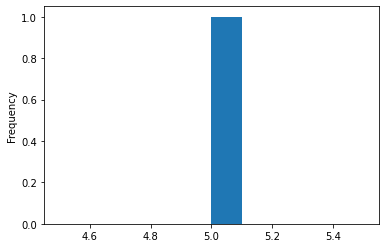

In [25]:
avaliacoes.query("filmeid == 102084")["nota"].plot(kind = 'hist') 

##desafio4
arredondar o valor da coluna de nota media em 2 casas

##desafio5 
descobrir os generos de filmes(quais são eles, unicos) (esse daqui o bicho pega)

##desafio6
contar o numero de aparições de cada genero.

##desafio7
plotar o gráfico de aparições por genero, pode ser um gráfico de tipo igual a 
barra


# Aula 2 




In [26]:
filmes["generos"].str.get_dummies('|').sum() #srt é string, para cortar a parte que você quer, get dummies cria variaveis que true é 1 e 0 falso, por ultimo o | é para separação, por ultimo "sum" é somar generos


(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

In [27]:
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)  #ordenar por ordem decrescente generos

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

In [28]:
filmes.index #dataframe do filme, tem o indice  que vai do 0 até  9742 

RangeIndex(start=0, stop=9742, step=1)

In [29]:
filmes


,filmeid,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [30]:
filmes.values 

array([[1, 'Toy Story (1995)',
        'Adventure|Animation|Children|Comedy|Fantasy'],
       [2, 'Jumanji (1995)', 'Adventure|Children|Fantasy'],
       [3, 'Grumpier Old Men (1995)', 'Comedy|Romance'],
       ...,
       [193585, 'Flint (2017)', 'Drama'],
       [193587, 'Bungo Stray Dogs: Dead Apple (2018)',
        'Action|Animation'],
       [193609, 'Andrew Dice Clay: Dice Rules (1991)', 'Comedy']],
      dtype=object)

In [31]:
filmes['generos'].str.get_dummies('|').sum().sort_values(ascending=False).index

Index(['Drama', 'Comedy', 'Thriller', 'Action', 'Romance', 'Adventure',
       'Crime', 'Sci-Fi', 'Horror', 'Fantasy', 'Children', 'Animation',
       'Mystery', 'Documentary', 'War', 'Musical', 'Western', 'IMAX',
       'Film-Noir', '(no genres listed)'],
      dtype='object')

In [32]:
filmes['generos'].str.get_dummies('|').sum().sort_values(ascending=False).values #valores

array([4361, 3756, 1894, 1828, 1596, 1263, 1199,  980,  978,  779,  664,
        611,  573,  440,  382,  334,  167,  158,   87,   34])

In [33]:
filmes['generos'].str.get_dummies('|').sum().sort_index()  #ordenar pelo indice, ordem alfabetica

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

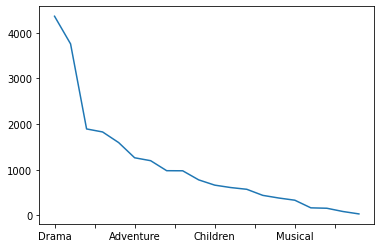

In [34]:
filmes['generos'].str.get_dummies('|').sum().sort_values(ascending=False).plot()
#naofaz sentido nenhum porque  esta se referindo diferentamente ao genero, nao ao genero mais visto

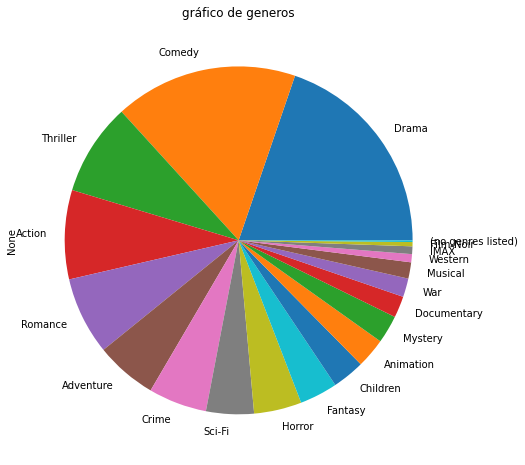

In [35]:
filmes['generos'].str.get_dummies('|').sum().sort_values(ascending=False).plot(
    kind='pie',
     title = 'gráfico de generos',
     figsize =(8,8))
plt.show()

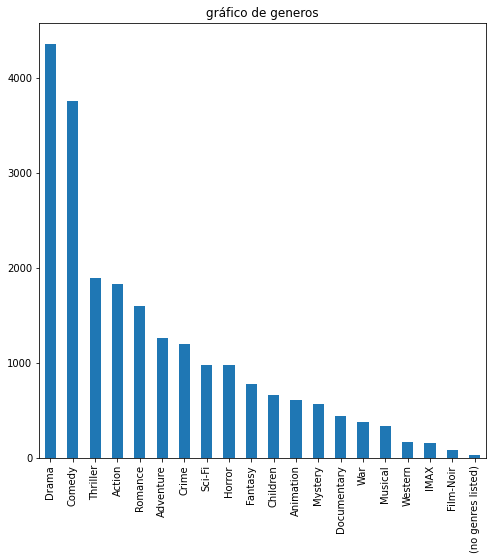

In [36]:
  filmes['generos'].str.get_dummies('|').sum().sort_values(ascending=False).plot(
    kind='bar',
     title = 'gráfico de generos',
     figsize =(8,8))
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


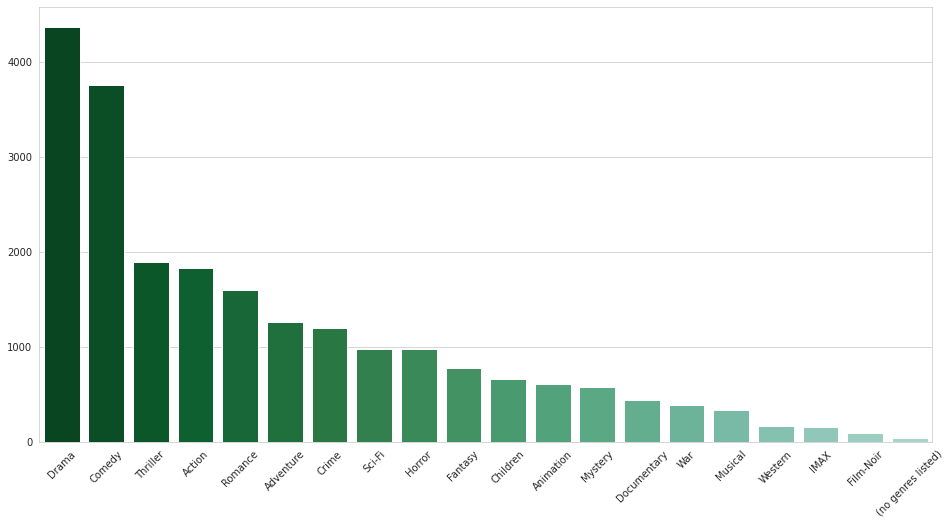

In [37]:
import seaborn as sns
sns.set_style("whitegrid")

filmes_por_genero = filmes['generos'].str.get_dummies('|').sum().sort_index().sort_values(ascending = False)
plt.figure(figsize = (16,8))
plt.xticks(rotation=45)

sns.barplot(x = filmes_por_genero.index,
            y = filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r",n_colors =len(filmes_por_genero) + 10 ))
plt.show()


In [38]:
pop = 1000
sal = 1000000

salario999 = 1
media = (sal * 1 + salario999 * 999)/1000
media

1000.999

In [39]:
notas_media_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

In [40]:
filmes_com_media.sort_values('nota', ascending=False)[2450:2500]   #selecionando para ver os filmes entre o numero 2450 e 2500


,filmeid,titulo,generos,nota
745,973,Meet John Doe (1941),Comedy|Drama,3.900000
6632,56251,Futurama: Bender's Big Score (2007),Animation|Comedy|Sci-Fi,3.900000
101,116,Anne Frank Remembered (1995),Documentary,3.900000
5719,27846,"Corporation, The (2003)",Documentary,3.900000
802,1050,Looking for Richard (1996),Documentary|Drama,3.900000
3983,5617,Secretary (2002),Comedy|Drama|Romance,3.900000
1323,1785,King of New York (1990),Crime|Thriller,3.900000
7103,70599,"Time Traveler's Wife, The (2009)",Drama|Romance|Sci-Fi,3.900000
5248,8607,Tokyo Godfathers (2003),Adventure|Animation|Drama,3.900000
4677,6985,"Passion of Joan of Arc, The (Passion de Jeanne...",Drama,3.900000


3.9209302325581397


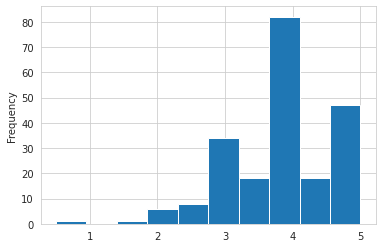

In [41]:
notas_do_filme_2 = avaliacoes.query("filmeid==1")["nota"]
print(notas_do_filme_2.mean())
avaliacoes.query("filmeid==1")["nota"].plot(kind='hist')


In [42]:
notas_do_filme_2.describe()

count    215.000000
mean       3.920930
std        0.834859
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: nota, dtype: float64

In [43]:
avaliacoes.groupby("filmeid").mean()

,usuárioid,nota,momento
filmeid,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08
...,...,...,...
193581,184.000000,4.000000,1.537109e+09
193583,184.000000,3.500000,1.537110e+09
193585,184.000000,3.500000,1.537110e+09


In [44]:
filmes

,filmeid,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [45]:
filmes_com_media.sort_values("nota", ascending= False)[2450:2500]

,filmeid,titulo,generos,nota
745,973,Meet John Doe (1941),Comedy|Drama,3.900000
6632,56251,Futurama: Bender's Big Score (2007),Animation|Comedy|Sci-Fi,3.900000
101,116,Anne Frank Remembered (1995),Documentary,3.900000
5719,27846,"Corporation, The (2003)",Documentary,3.900000
802,1050,Looking for Richard (1996),Documentary|Drama,3.900000
3983,5617,Secretary (2002),Comedy|Drama|Romance,3.900000
1323,1785,King of New York (1990),Crime|Thriller,3.900000
7103,70599,"Time Traveler's Wife, The (2009)",Drama|Romance|Sci-Fi,3.900000
5248,8607,Tokyo Godfathers (2003),Adventure|Animation|Drama,3.900000
4677,6985,"Passion of Joan of Arc, The (Passion de Jeanne...",Drama,3.900000


count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

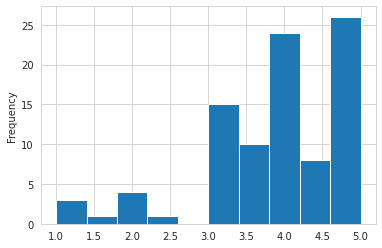

In [46]:
def plot_filme(n) :

  notas_do_filme = avaliacoes.query(f"filmeid=={n}")["nota"]
  notas_do_filme.plot(kind='hist')
  return notas_do_filme.describe()
plot_filme(919)


count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

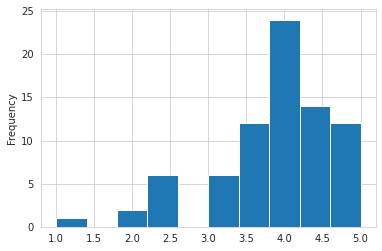

In [47]:
plot_filme(46578)

In [58]:
def plot_filme(n) :

  notas_do_filme = avaliacoes.query(f"filmeid=={n}")["nota"]
  notas_do_filme.plot(kind='hist')
  plt.show()
  notas_do_filme.plot.box()
  plt.show
  return notas_do_filme.describe()

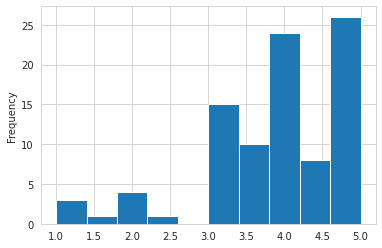

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

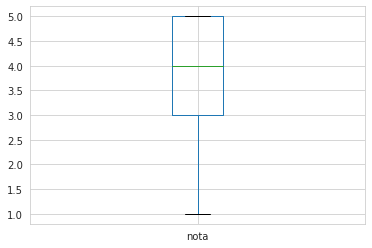

In [59]:
 plot_filme(919)

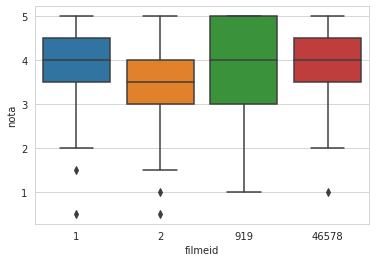

In [61]:
sns.boxplot(data = avaliacoes.query('filmeid in [1,2,919,46578]'), x = "filmeid", y= "nota")